# Task 5: Image Comparison - Global Features

In [99]:
# Importing required modules
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

In [100]:
# Defining path to images
images_path = 'resources/images/'

### Exercise 1

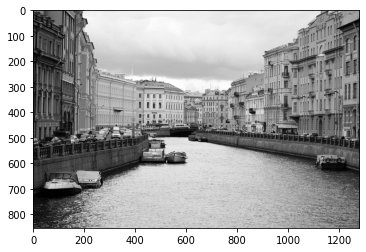

In [101]:
# Reading image with OpenCV
image_1_name = 'saint-petersburg-2547440_1280.jpg'
image_1 = cv2.imread(images_path + image_1_name)

# Converting image to grayscale and displaying on the screen
image_1_grayscale = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
plt.imshow(image_1_grayscale, cmap = 'gray')
plt.show()

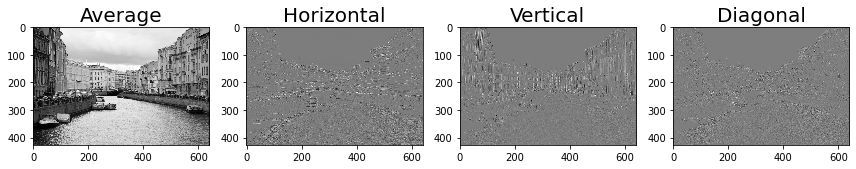

In [102]:
# Performing Haar wavelet transformation
c = pywt.dwt2(image_1_grayscale, 'haar')

# Getting 4 filters
cA, (cH, cV, cD) = c

# Displaying obtained filters on the screen
titles = ['Average', 'Horizontal', 'Vertical', 'Diagonal']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

#w, h = cA.shape
#c_inverse1 = pywt.idwt2(c, 'haar')#[:w,:h]
#plt.imshow(c_inverse1, cmap = 'gray')
#plt.show()

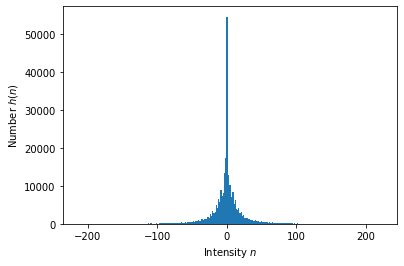

Intensity value with the biggest amount of pixels is: -0.6328125
Number of pixels correspoding to this intensity is: 54487.0


In [103]:
# Displaying histogram for number of pixels correspoding to particular intensity
grayscale_hist = plt.hist(cV.ravel(), bins = 256)
plt.xlabel('Intensity $n$')
plt.ylabel('Number $h(n)$')
plt.show()

# Searching for intensity value with the biggest amount of pixels
max_pixels = 0
intensity_index = 0
for i in range(0, len(grayscale_hist[0])):
    if grayscale_hist[0][i] > max_pixels:
        max_pixels = grayscale_hist[0][i]
        intensity_index = i
print("Intensity value with the biggest amount of pixels is: {}".format(grayscale_hist[1][intensity_index]))
print("Number of pixels correspoding to this intensity is: {}".format(grayscale_hist[0][intensity_index]))

### Exercise 2

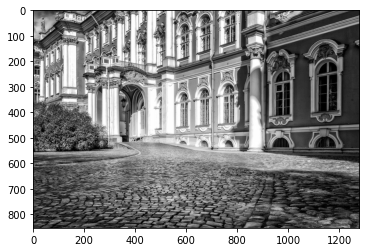

In [104]:
# Reading image with OpenCV
image_2_name = 'hermitage-3711588_1280.jpg'
image_2 = cv2.imread(images_path + image_2_name)

# Converting image to grayscale and displaying on the screen
image_2_grayscale = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
plt.imshow(image_2_grayscale, cmap = 'gray')
plt.show()

First stage of Haar transformation


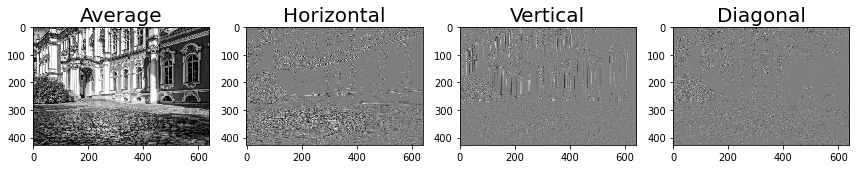

In [105]:
# Performing first stage of Haar wavelet transformation
print('First stage of Haar transformation')
c = pywt.dwt2(image_2_grayscale, 'haar')

# Getting 4 filters
cA, (cH, cV, cD) = c

# Displaying obtained filters on the screen
titles = ['Average', 'Horizontal', 'Vertical', 'Diagonal']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

Second stage of Haar transformation


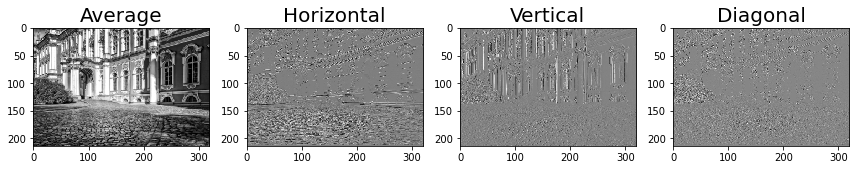

In [106]:
# Performing second stage of Haar wavelet transformation
print('Second stage of Haar transformation')
c1 = pywt.dwt2(cA, 'haar')

# Getting 4 filters
cA1, (cH1, cV1, cD1) = c1

# Displaying obtained filters on the screen
titles = ['Average', 'Horizontal', 'Vertical', 'Diagonal']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()